In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Image

# Make sure that caffe is on the python path:
caffe_root = '../'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe
import h5py
import os
# configure plotting
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [2]:
# Write out the data to HDF5 files in a temp directory.
# This file is assumed to be caffe_root/examples/hdf5_classification.ipynb
sz=128
batches=1
channels=1
X=100*np.random.rand(16*sz*sz*channels*batches).reshape(batches,channels,16,sz,sz)
y=np.random.randint(20, size=(1,16,sz,sz))
print y.shape
print X.shape



dirname = os.path.abspath('./net_surgery/data')
if not os.path.exists(dirname):
    os.makedirs(dirname)

train_filename = os.path.join(dirname, 'train.h5')
test_filename = os.path.join(dirname, 'test.h5')

# HDF5DataLayer source should be a file containing a list of HDF5 filenames.
# To show this off, we'll list the same data file twice.
with h5py.File(train_filename, 'w') as f:
    f['data'] = X
    f['label'] = y.astype(np.float32)
with open(os.path.join(dirname, 'train.txt'), 'w') as f:
    f.write(train_filename + '\n')
    f.write(train_filename + '\n')
    
# HDF5 is pretty efficient, but can be further compressed.
"""comp_kwargs = {'compression': 'gzip', 'compression_opts': 1}
with h5py.File(test_filename, 'w') as f:
    f.create_dataset('data', data=Xt, **comp_kwargs)
    f.create_dataset('label', data=yt.astype(np.float32), **comp_kwargs)
with open(os.path.join(dirname, 'test.txt'), 'w') as f:
    f.write(test_filename + '\n')"""

(1, 16, 128, 128)
(1, 1, 16, 128, 128)


"comp_kwargs = {'compression': 'gzip', 'compression_opts': 1}\nwith h5py.File(test_filename, 'w') as f:\n    f.create_dataset('data', data=Xt, **comp_kwargs)\n    f.create_dataset('label', data=yt.astype(np.float32), **comp_kwargs)\nwith open(os.path.join(dirname, 'test.txt'), 'w') as f:\n    f.write(test_filename + '\n')"

In [2]:
# Load the net, list its data and params, and filter an example image.
caffe.set_mode_gpu()
netroger = caffe.Net('3d_data/conv.prototxt', caffe.TRAIN)
print("blobs {}\nparams {}".format(netroger.blobs.keys(), netroger.params.keys()))

print netroger.blobs['conv'].data.shape
print netroger.blobs['conv'].diff.shape

print netroger.blobs['conv'].count

#print netroger.blobs['upscore'].data.shape
#print netroger.blobs['upscore'].diff.shape

print netroger.layers



blobs ['data', 'label', 'data_data_0_split_0', 'data_data_0_split_1', 'conv', 'pool1', 'upscore', 'score', 'loss']
params ['conv', 'upscore']
(30, 3, 14, 30, 30)
(30, 3, 14, 30, 30)
1134000


In [3]:
misblobs=netroger.blobs.keys()
for i in xrange(len(misblobs)):
    print misblobs[i]
    print netroger.blobs[misblobs[i]].data.shape 

data
(30, 1, 16, 32, 32)
label
(30, 16, 32, 32)
data_data_0_split_0
(30, 1, 16, 32, 32)
data_data_0_split_1
(30, 1, 16, 32, 32)
conv
(30, 3, 14, 30, 30)
pool1
(30, 3, 13, 29, 29)
upscore
(30, 5, 27, 59, 59)
score
(30, 5, 16, 32, 32)
loss
()


In [6]:
netroger.forward()
netroger.backward()
src=netroger.blobs['data']
g = src.diff[0]

diffs = netroger.backward(diffs=['data','conv'])

[ 0.]


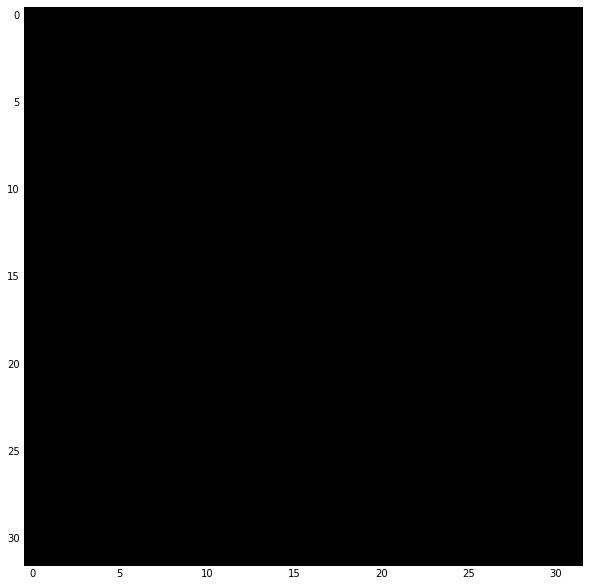

In [4]:
idrandom=np.random.randint(30)

testdata= netroger.blobs['data'].data.shape
plt.figure()
filt_min, filt_max = netroger.blobs['data'].data.min(), netroger.blobs['data'].data.max()
plt.imshow(netroger.blobs['data'].data[idrandom, 0,10,:,:], vmin=filt_min, vmax=filt_max)
plt.imshow(netroger.blobs['label'].data[idrandom,5,:,:])
dataimg=netroger.blobs['label'].data[idrandom,5,:,:]
print np.unique(dataimg)

In [3]:


### load the solver and create train and test nets
solver = None  # ignore this workaround for lmdb data (can't instantiate two solvers on the same data)
solver = caffe.SGDSolver('3d_data/solver.prototxt')

In [ ]:
for _ in range(1000):
    solver.step(1)